# Close Location Value (CLV) 

https://www.investopedia.com/terms/c/close_location_value.asp

https://www.marketvolume.com/technicalanalysis/closelocationvalue.asp

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

# fix_yahoo_finance is used to fetch data 
import fix_yahoo_finance as yf
yf.pdr_override()

In [2]:
# input
symbol = 'AAPL'
start = '2018-12-01'
end = '2019-04-01'

# Read data 
df = yf.download(symbol,start,end)

# View Columns
df.head()

[*********************100%***********************]  1 of 1 downloaded


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-12-03,184.460007,184.940002,181.210007,184.820007,182.630859,40802500
2018-12-04,180.949997,182.389999,176.270004,176.690002,174.597153,41344300
2018-12-06,171.759995,174.779999,170.419998,174.720001,172.650482,43098400
2018-12-07,173.490005,174.490005,168.300003,168.490005,166.494278,42281600
2018-12-10,165.000000,170.089996,163.330002,169.600006,167.591125,62026000


In [3]:
n = 10
# df['CLV'] = (df['Adj Close'] - df['Low']) - (df['High'] - df['Adj Close']) / (df['High'] - df['Low'])
df['CLV'] = ((df['Adj Close'] - df['Low']) - (df['High'] - df['Adj Close']) / (df['High'] - df['Low'])).shift(n)

In [4]:
df.head(20)

,Open,High,Low,Close,Adj Close,Volume,CLV
Date,,,,,,,
2018-12-03,184.460007,184.940002,181.210007,184.820007,182.630859,40802500,NaN
2018-12-04,180.949997,182.389999,176.270004,176.690002,174.597153,41344300,NaN
2018-12-06,171.759995,174.779999,170.419998,174.720001,172.650482,43098400,NaN
2018-12-07,173.490005,174.490005,168.300003,168.490005,166.494278,42281600,NaN
2018-12-10,165.000000,170.089996,163.330002,169.600006,167.591125,62026000,NaN
2018-12-11,171.660004,171.789993,167.000000,168.630005,166.632614,47281700,NaN
2018-12-12,170.399994,171.919998,169.020004,169.100006,167.097046,35627700,NaN
2018-12-13,170.490005,172.570007,169.550003,170.949997,168.925125,31898600,NaN
2018-12-14,169.000000,169.080002,165.279999,165.479996,163.519913,40703700,NaN


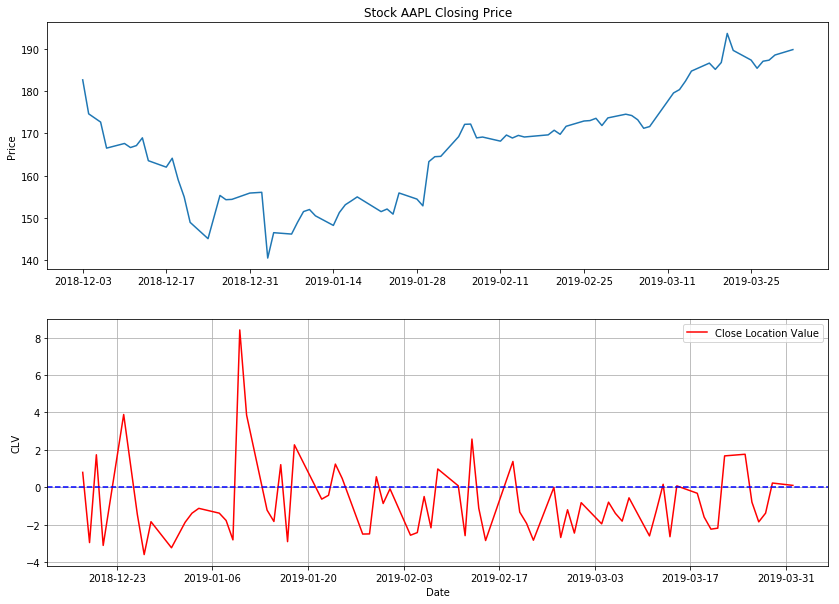

In [5]:
fig = plt.figure(figsize=(14,10))
ax1 = plt.subplot(2, 1, 1)
ax1.plot(df['Adj Close'])
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')

ax2 = plt.subplot(2, 1, 2)
ax2.plot(df['CLV'], label='Close Location Value', color='red')
ax2.axhline(y=0, color='blue', linestyle='--')
#ax2.axhline(y=0.5, color='darkblue')
#ax2.axhline(y=-0.5, color='darkblue')
ax2.grid()
ax2.set_ylabel('CLV')
ax2.set_xlabel('Date')
ax2.legend(loc='best')

## Candlestick with Close Location Value (CLV) 

In [6]:
from matplotlib import dates as mdates
import datetime as dt

dfc = df.copy()
dfc['VolumePositive'] = dfc['Open'] < dfc['Adj Close']
#dfc = dfc.dropna()
dfc = dfc.reset_index()
dfc['Date'] = pd.to_datetime(dfc['Date'])
dfc['Date'] = dfc['Date'].apply(mdates.date2num)
dfc.head()

,Date,Open,High,Low,Close,Adj Close,Volume,CLV,VolumePositive
0,737031.0,184.460007,184.940002,181.210007,184.820007,182.630859,40802500,NaN,False
1,737032.0,180.949997,182.389999,176.270004,176.690002,174.597153,41344300,NaN,False
2,737034.0,171.759995,174.779999,170.419998,174.720001,172.650482,43098400,NaN,True
3,737035.0,173.490005,174.490005,168.300003,168.490005,166.494278,42281600,NaN,False
4,737038.0,165.000000,170.089996,163.330002,169.600006,167.591125,62026000,NaN,True


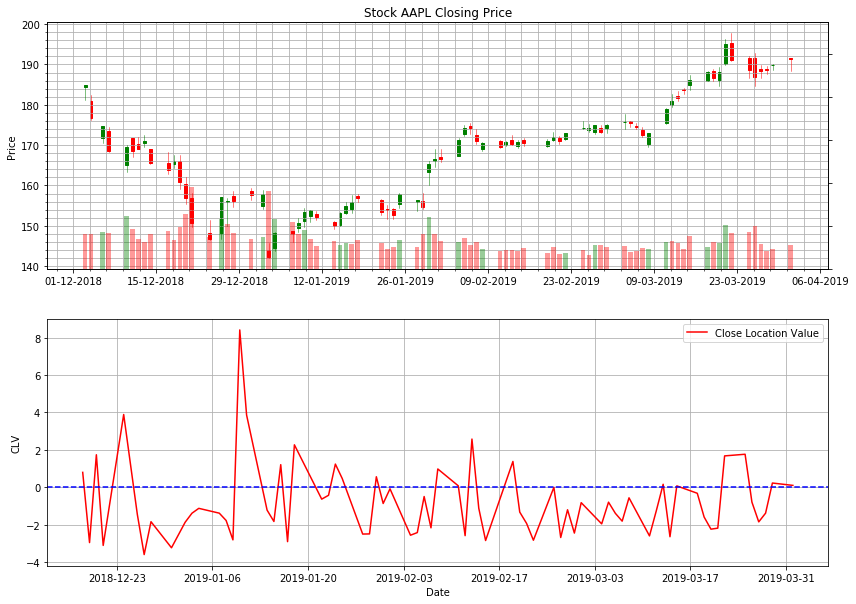

In [7]:
from mpl_finance import candlestick_ohlc

fig = plt.figure(figsize=(14,10))
ax1 = plt.subplot(2, 1, 1)
candlestick_ohlc(ax1,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax1.xaxis_date()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax1.grid(True, which='both')
ax1.minorticks_on()
ax1v = ax1.twinx()
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
ax1v.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
ax1v.axes.yaxis.set_ticklabels([])
ax1v.set_ylim(0, 3*df.Volume.max())
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')

ax2 = plt.subplot(2, 1, 2)
ax2.plot(df['CLV'], label='Close Location Value', color='red')
ax2.axhline(y=0, color='blue', linestyle='--')
#ax2.axhline(y=0.5, color='darkblue')
#ax2.axhline(y=-0.5, color='darkblue')
ax2.grid()
ax2.set_ylabel('CLV')
ax2.set_xlabel('Date')
ax2.legend(loc='best')